<a href="https://colab.research.google.com/github/Shtrohaim/-19-23-/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F_%D0%BF%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87_(%D0%9F%D0%98%D0%A1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as prepro
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data",header=None)

In [3]:
names = ("Id","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Class")
data.columns = names
data = data.drop(columns=["Id"])

In [4]:
data['Class'].replace(
    {
       1:"building_float_processed",
       2:"building_non_float_processed",
       3:"vehicle_float_processed",
       4:"vehicle_non_float_processed",
       5:"containers",
       6:"tableware",
       7:"headlamps" 
    }, inplace=True)

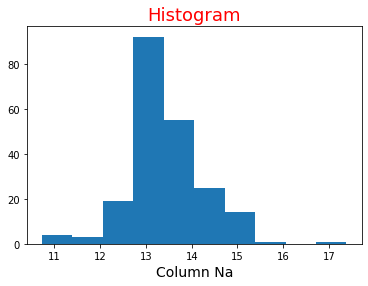

In [5]:
#1

col="Na" #@param ["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Class"]
fig, ax = plt.subplots(figsize=(6,4))

ax.hist(data[col])
ax.set_xlabel("Column "+str(col), fontsize=14)
ax.set_title("Histogram", color='red', fontsize=18)

plt.show()

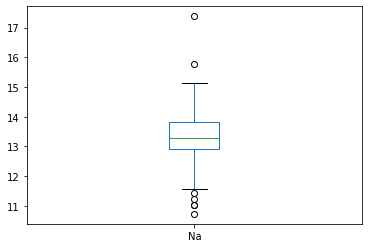

In [6]:
#2

col="Na" #@param ["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe"]
fig, ax = plt.subplots()

data[col].plot(kind='box')
plt.show()


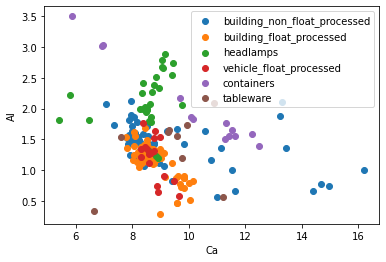

In [7]:
#3

col1="Ca" #@param ["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe"]
col2="Al" #@param ["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe"]
fig, ax = plt.subplots()

for glassType in data['Class'].value_counts().index.values:
  ax.scatter(data[col1][ data['Class']==glassType ],
             data[col2][ data['Class']==glassType ],
             label=glassType)

ax.set_xlabel(col1)
ax.set_ylabel(col2)
ax.legend()

plt.show()

In [8]:
for col in data.columns:
  fr = np.random.randint(5,10)/100
  data.loc[data.sample(frac=fr).index,col] = np.nan

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      201 non-null    float64
 1   Na      197 non-null    float64
 2   Mg      197 non-null    float64
 3   Al      195 non-null    float64
 4   Si      195 non-null    float64
 5   K       197 non-null    float64
 6   Ca      203 non-null    float64
 7   Ba      199 non-null    float64
 8   Fe      197 non-null    float64
 9   Class   199 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [10]:
data.mean()

RI     1.518382
Na    13.408122
Mg     2.739746
Al     1.439128
Si    72.657641
K      0.507766
Ca     8.880788
Ba     0.183417
Fe     0.057107
dtype: float64

In [11]:
data_fillna_mean = data.fillna(data.mean()).copy()
data_fillna_mean.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.518382,13.640000,4.49,1.100000,71.78,0.060000,8.75,0.0,0.0,building_float_processed
1,1.517610,13.890000,3.60,1.360000,72.73,0.480000,7.83,0.0,0.0,building_float_processed
2,1.516180,13.408122,3.55,1.439128,72.99,0.390000,7.78,0.0,0.0,building_float_processed
3,1.518382,13.210000,3.69,1.290000,72.61,0.570000,8.22,0.0,0.0,building_float_processed
4,1.517420,13.270000,3.62,1.240000,73.08,0.507766,8.07,0.0,0.0,building_float_processed


In [12]:
data_fillna_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Class   199 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [13]:
data_fiiled_nan = data.fillna(data.mean(), ).copy()
data_fiiled_nan['Class'].fillna(data['Class'].value_counts().index.values[0], inplace=True)

In [14]:
data['Class'].value_counts().index.values[0]
data['Class'].mode()
data_fillna_mean['Class'].fillna(data['Class'].value_counts().index.values[0], inplace = True)

In [15]:
data_fillna_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Class   214 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [16]:
pca = PCA( )
pca.fit(data_fiiled_nan[data_fiiled_nan.columns[data_fiiled_nan.columns.values != 'Class']])

pca.explained_variance_ratio_*100

array([4.31856905e+01, 2.70723172e+01, 1.19093022e+01, 1.02171662e+01,
       4.35739783e+00, 1.90800051e+00, 1.20091273e+00, 1.49184082e-01,
       2.87313960e-05])

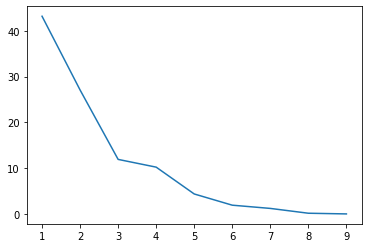

In [17]:
fig, ax = plt.subplots()
ax.plot(np.arange(1, 10) ,pca.explained_variance_ratio_*100)

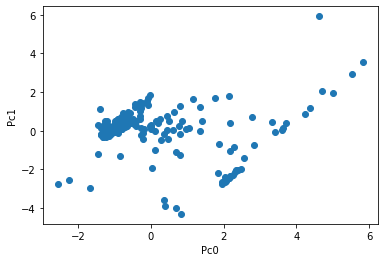

In [18]:
result = pca.transform(data_fiiled_nan[data_fiiled_nan.columns.values[data_fiiled_nan.columns.values != 'Class']])

pca_Names = []

for i in range(9):
  pca_Names.append('Pc' + str(i))

data_pca = pd.DataFrame(result,columns=pca_Names) 
fig, ax = plt.subplots()

ax.scatter(data_pca['Pc0'], data_pca['Pc1'])
ax.set_xlabel('Pc0')
ax.set_ylabel('Pc1')

plt.show()

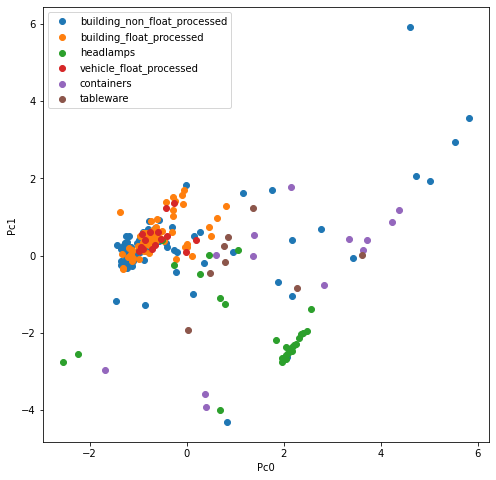

In [19]:
data_pca['Class'] = data_fillna_mean['Class'].copy()

col1 = 'Pc0'
col2 = 'Pc1'

fig, ax = plt.subplots(figsize=(8, 8))

for glassType in data_pca['Class'].value_counts().index.values:
  ax.scatter(data_pca[col1][data_pca['Class'] == glassType], 
             data_pca[col2][data_pca['Class'] == glassType],
             label = glassType)
  ax.set_xlabel(col1)
  ax.set_ylabel(col2)
  ax.legend()

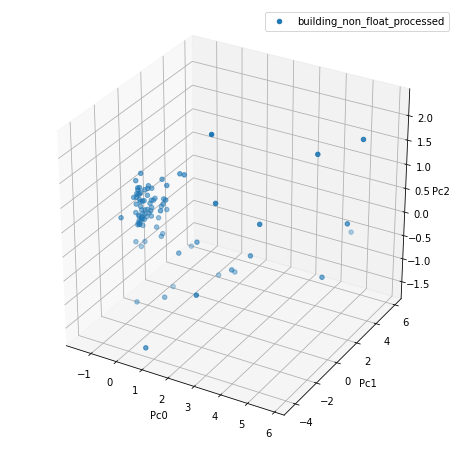

In [20]:
col1 = 'Pc0'
col2 = 'Pc1'
col3 = 'Pc2'

# fig, ax = plt.subplots(figsize=(8, 8))
fig = plt.figure(figsize = (8, 8))
ax = plt.axes(projection = '3d')

for glassType in data_pca['Class'].value_counts().index.values:
  ax.scatter(data_pca[col1][data_pca['Class'] == glassType], 
             data_pca[col2][data_pca['Class'] == glassType],
             data_pca[col3][data_pca['Class'] == glassType],
             label = glassType)
  
  ax.set_xlabel(col1)
  ax.set_ylabel(col2)
  ax.set_zlabel(col3)

  ax.legend()

  plt.show()

In [21]:
corr = data_fillna_mean.corr() 
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.193710,-0.117312,-0.388297,-0.559305,-0.285063,0.707050,0.008795,0.175186
Na,-0.193710,1.000000,-0.248148,0.120078,-0.057498,-0.245566,-0.160581,0.289385,-0.213586
Mg,-0.117312,-0.248148,1.000000,-0.460478,-0.152869,-0.019684,-0.354276,-0.496530,0.044893
Al,-0.388297,0.120078,-0.460478,1.000000,0.008664,0.337458,-0.275222,0.462991,-0.053931
Si,-0.559305,-0.057498,-0.152869,0.008664,1.000000,-0.066592,-0.174578,-0.129638,-0.087625
K,-0.285063,-0.245566,-0.019684,0.337458,-0.066592,1.000000,-0.328232,-0.028133,0.009605
Ca,0.707050,-0.160581,-0.354276,-0.275222,-0.174578,-0.328232,1.000000,-0.197928,0.124876
Ba,0.008795,0.289385,-0.496530,0.462991,-0.129638,-0.028133,-0.197928,1.000000,-0.044050
Fe,0.175186,-0.213586,0.044893,-0.053931,-0.087625,0.009605,0.124876,-0.044050,1.000000


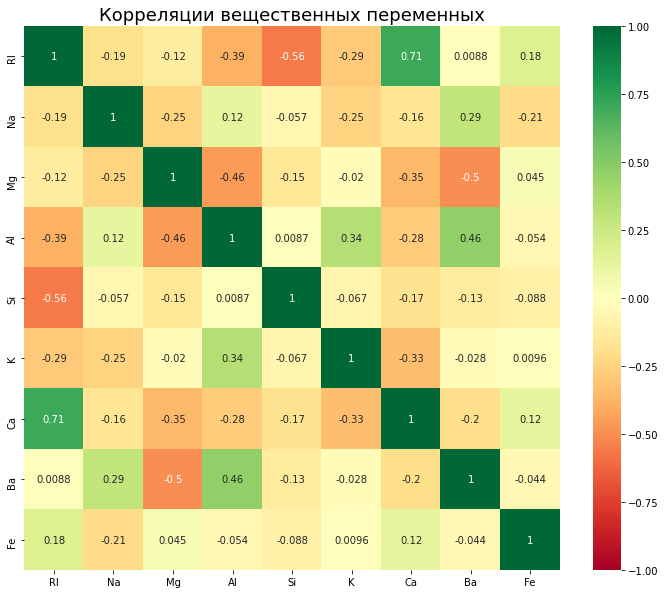

In [22]:
plt.figure(figsize=(12, 10))
ax = sns.heatmap(corr, annot=True, vmax=1, vmin = -1, cmap='RdYlGn', )
ax.set_title('Корреляции вещественных переменных', fontsize = 18)

plt.show()

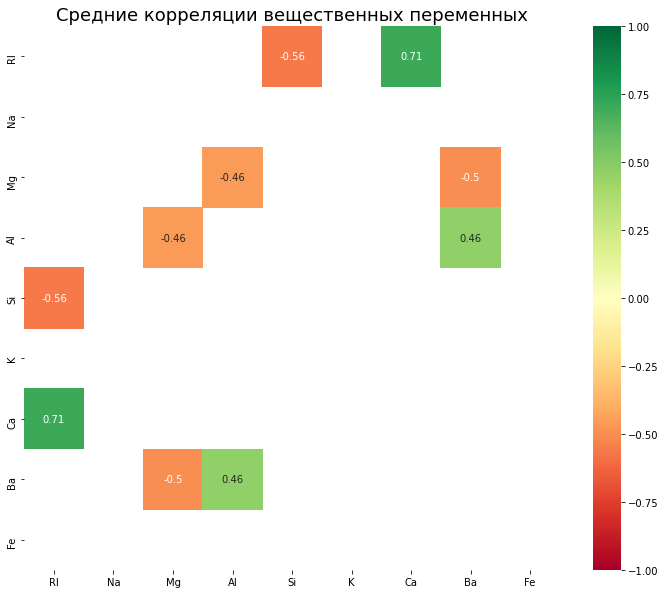

In [23]:
# corr[(0.45 < corr[corr < 0.75]) | (corr[corr > -0.75] < -0.45)]

plt.figure(figsize=(12, 10))
ax = sns.heatmap(corr[(0.45 < corr[corr < 0.75]) | (corr[corr > -0.75] < -0.45)], 
                 annot=True, vmax=1, vmin = -1, cmap='RdYlGn')

ax.set_title('Средние корреляции вещественных переменных', fontsize = 18)

plt.show()

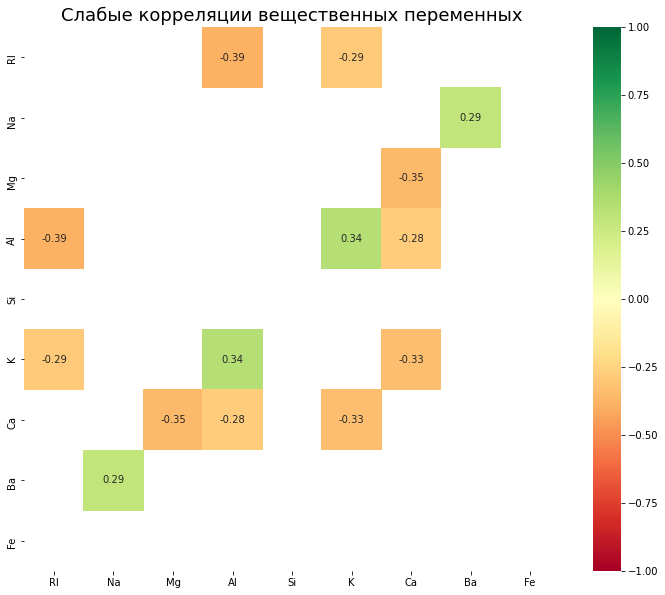

In [24]:
plt.figure(figsize=(12, 10))
ax = sns.heatmap(corr[(0.25 < corr[corr < 0.45]) | (corr[corr > -0.45] < -0.25)], 
                 annot=True, vmax=1, vmin = -1, cmap='RdYlGn')

ax.set_title('Слабые корреляции вещественных переменных', fontsize = 18)

plt.show()

In [25]:
forest = ExtraTreesClassifier(n_estimators=100)

In [26]:
forest.fit(
    data_fillna_mean[ data_fillna_mean.columns.values[data_fillna_mean.columns.values!='Class'] ], 
    data_fillna_mean['Class']
    )

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [27]:
forest.feature_importances_

array([0.13021659, 0.10010495, 0.15568475, 0.16305157, 0.08714782,
       0.11232841, 0.12026215, 0.0715471 , 0.05965665])

In [28]:
np.sort(forest.feature_importances_, )[::-1]

array([0.16305157, 0.15568475, 0.13021659, 0.12026215, 0.11232841,
       0.10010495, 0.08714782, 0.0715471 , 0.05965665])

In [29]:
np.argsort(forest.feature_importances_, )[::-1]

array([3, 2, 0, 6, 5, 1, 4, 7, 8])

In [30]:
importances = forest.feature_importances_
indices = np.argsort(forest.feature_importances_, )[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(9):
    print("%d. feature %s (%f)" % (f + 1, data_fillna_mean.columns.values[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature Al (0.163052)
2. feature Mg (0.155685)
3. feature RI (0.130217)
4. feature Ca (0.120262)
5. feature K (0.112328)
6. feature Na (0.100105)
7. feature Si (0.087148)
8. feature Ba (0.071547)
9. feature Fe (0.059657)


In [31]:
std = np.std( [tree.feature_importances_ for tree in forest.estimators_], axis=0)
std

array([0.03608089, 0.03270684, 0.04146805, 0.04776511, 0.0281429 ,
       0.03425733, 0.03591655, 0.04371965, 0.019938  ])

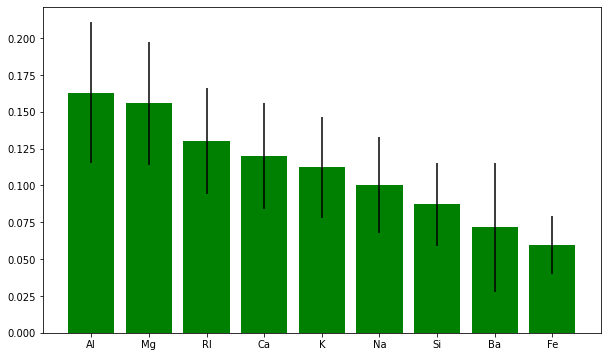

In [32]:
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(data_fillna_mean.columns.values[indices], importances[indices],
       color="g", yerr=std[indices], align="center")

plt.show()